## Доверительные интервалы для среднего

**1.** Для 61 большого города в Англии и Уэльсе известны средняя годовая смертность на 100000 населения (по данным 1958–1964) и концентрация кальция в питьевой воде (в частях на миллион). Чем выше концентрация кальция, тем жёстче вода. Города дополнительно поделены на северные и южные.

Постройте 95% доверительный интервал для средней годовой смертности в больших городах. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки. 

> Будьте осторожны при использовании метода std()! Дело в том, что у объекта numpy он по умолчанию вычисляется как $\sqrt{\frac1{n}\sum\limits_{i=1}^n\left(X_i-\bar{X}\right)^2}$, а у объекта pandas — как
$\sqrt{\frac1{n-1}\sum\limits_{i=1}^n\left(X_i-\bar{X}\right)^2}$ 
>
>Нас интересует только второй вариант, несмещённая оценка стандартного отклонения.
>
>Чтобы не думать всё время о том, правильно ли вычисляется в вашем случае std(), можно всегда использовать std(ddof=1) (ddof — difference in degrees of freedom), тогда нормировка всегда будет на n-1.

In [1]:
import numpy as np
import pandas as pd
from statsmodels.stats.weightstats import _tconfint_generic

In [2]:
data = pd.read_csv('data/water.txt', sep='\t')

In [3]:
data.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


In [4]:
tconfint_morality = _tconfint_generic(
    data['mortality'].mean(),
    data['mortality'].std(ddof=1) / np.sqrt(len(data['mortality'])),
    len(data['mortality'])-1, 0.05, 'two-sided')
tconfint_morality = [round(x, 4) for x in tconfint_morality]
print(f'95% t-confidence interval for the mean mortality: {tconfint_morality}')

95% t-confidence interval for the mean mortality: [1476.0833, 1572.2117]


**2.** На данных из предыдущего вопроса постройте 95% доверительный интервал для средней годовой смертности по всем южным городам. Чему равна его верхняя граница? Округлите ответ до 4 знаков после десятичной точки.

In [5]:
tconfint_morality_south = _tconfint_generic(
    data[data.location == 'South'].mortality.mean(),
    data[data.location == 'South'].mortality.std(ddof=1) / np.sqrt(len(data[data.location == 'South'])),
    len(data[data.location == 'South']) - 1, 0.05, 'two-sided')
tconfint_morality_south  = [round(x, 4) for x in tconfint_morality_south]
print(f'95% t-confidence interval for the mean mortality in South cities: {tconfint_morality_south}')

95% t-confidence interval for the mean mortality in South cities: [1320.1517, 1433.4636]


**3.** На тех же данных постройте 95% доверительный интервал для средней годовой смертности по всем северным городам. Пересекается ли этот интервал с предыдущим? Как вы думаете, какой из этого можно сделать вывод? 

In [6]:
tconfint_morality_north = _tconfint_generic(
    data[data.location == 'North'].mortality.mean(),
    data[data.location == 'North'].mortality.std(ddof=1) / np.sqrt(len(data[data.location == 'North'])),
    len(data[data.location == 'North']) - 1, 0.05, 'two-sided')
tconfint_morality_north = [round(x, 4) for x in tconfint_morality_north]
print(f'95% t-confidence interval for the mean mortality in North cities: {tconfint_morality_north}')

95% t-confidence interval for the mean mortality in North cities: [1586.5605, 1680.6395]


**Вывод:** 
Интервалы не пересекаются; видимо, средняя смертность на севере и на юге существенно разная  

In [7]:
tconfint_hardness_south = _tconfint_generic(
    data[data.location == 'South'].hardness.mean(),
    data[data.location == 'South'].hardness.std(ddof=1) / np.sqrt(len(data[data.location == 'South'])),
    len(data[data.location == 'South']) - 1, 0.05, 'two-sided')
tconfint_hardness_south = [round(x, 4) for x in tconfint_hardness_south]

tconfint_hardness_north = _tconfint_generic(
    data[data.location == 'North'].hardness.mean(),
    data[data.location == 'North'].hardness.std(ddof=1) / np.sqrt(len(data[data.location == 'North'])),
    len(data[data.location == 'North']) - 1, 0.05, 'two-sided')
tconfint_hardness_north = [round(x, 4) for x in tconfint_hardness_north]
print(f'95% t-confidence interval for the mean hardness of water\n'\
      f'in South cities: {tconfint_hardness_south}\n'\
      f'in North cities: {tconfint_hardness_north}')

95% t-confidence interval for the mean hardness of water
in South cities: [53.4672, 86.0713]
in North cities: [21.4225, 39.3775]


**4.** Вспомним формулу доверительного интервала для среднего нормально распределённой случайной величины с дисперсией $\sigma^2$:

$$\bar{X}_n\pm z_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}$$
При $\sigma=1$ какой нужен объём выборки, чтобы на уровне доверия 95% оценить среднее с точностью $\pm0.1$?

In [8]:
from scipy import stats
print(f'n >= {np.ceil((stats.norm.ppf(1-0.05/2) / 0.1)**2)}')

n >= 385.0


**5.** Объём выборки, необходимый для построения доверительного интервала заданной ширины:
* увеличивается с ростом дисперсии выборки
* увеличивается с уменьшением требуемой ширины
* уменьшается с ростом $\alpha$

## Доверительные интервалы для долей

**1.** Большая часть млекопитающих неспособны во взрослом возрасте переваривать лактозу, содержащуюся в молоке. У людей за расщепление лактозы отвечает фермент лактаза, кодируемый геном LCT. У людей с вариантом 13910T этого гена лактаза продолжает функционировать на протяжении всей жизни. Распределение этого варианта гена сильно варьируется в различных генетических популяциях.

Из 50 исследованных представителей народа майя вариант 13910T был обнаружен у одного. Постройте нормальный 95% доверительный интервал для доли носителей варианта 13910T в популяции майя. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки.

In [9]:
from statsmodels.stats.proportion import proportion_confint

alpha = 0.05
count = 1
nobs = 50

# Стандартная функция scipy почему-то обрезает отрицательные значения
# stats.proportion.proportion_confint(1, 50, method = 'normal')

q_ = count * 1. / nobs
alpha_2 = 0.5 * alpha

std_ = np.sqrt(q_ * (1 - q_) / nobs)
dist = stats.norm.isf(alpha / 2.) * std_
ci_low = q_ - dist
ci_upp = q_ + dist

print(f'95% normal-confidence interval: {round(ci_low, 4),round(ci_upp, 4)}')

95% normal-confidence interval: (-0.0188, 0.0588)


**2.** В условиях предыдущей задачи постройте 95% доверительный интервал Уилсона для доли носителей варианта 13910T в популяции майя. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки.  

In [10]:
wils_confint = np.round(proportion_confint(1, 50, method = 'wilson'), 4)
print(f'95% wilson-confidence interval: {wils_confint}')

95% wilson-confidence interval: [0.0035 0.105 ]


**3.** Какой из двух построенных доверительных интервалов выглядит более вменяемым, учитывая, что параметр, для которого строится оценка, меняется от 0 до 1?
* Уилсона
> Нормальный интервал выходит за границы области определения параметра, это выглядит странно

**3.** Пусть в популяции майя действительно 2% носителей варианта 13910T, как в выборке, которую мы исследовали. Какой объём выборки нужен, чтобы с помощью нормального интервала оценить долю носителей гена 13910T с точностью $\pm0.01$ на уровне доверия 95%?

In [11]:
from statsmodels.stats.proportion import samplesize_confint_proportion
min_n = np.ceil(samplesize_confint_proportion(1.0/50, 0.01, method='normal'))
print(f'Объём выборки n >=: {min_n}')

Объём выборки n >=: 753.0


**4.** Постройте график зависимости объёма выборки, необходимого для оценки для доли носителей гена 13910T с точностью $\pm0.01$ на уровне доверия 95%, от неизвестного параметра $p$. Посмотрите, при каком значении $p$ нужно больше всего испытуемых. Как вы думаете, насколько вероятно, что выборка, которую мы анализируем, взята из случайной величины с этим значением параметра?

Как бы вы не ответили на последний вопрос, рассмотреть объём выборки, необходимый при таком $p$, всё равно полезно — это даёт максимально пессимистичную оценку необходимого объёма выборки.

Какой объём выборки нужен в худшем случае, чтобы с помощью нормального интервала оценить долю носителей гена 13910T с точностью $\pm0.01$ на уровне доверия 95%?  

Text(0, 0.5, 'n')

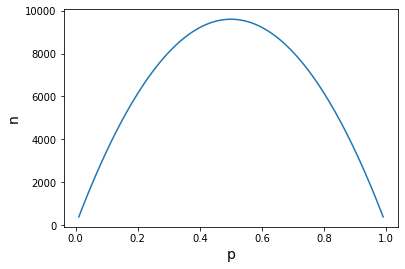

In [12]:
import matplotlib.pyplot as plt

p = np.arange(0.01, 1, 0.01)
n_p = samplesize_confint_proportion(p, 0.01, method='normal')
plt.plot(p, n_p)
plt.xlabel('p', fontsize=14)
plt.ylabel('n', fontsize=14)

In [13]:
worst_n = np.ceil(samplesize_confint_proportion(0.5, 0.01, method='normal'))
print(f'Объём выборки в худшем случае n >=: {worst_n}')

Объём выборки в худшем случае n >=: 9604.0
